# Mock Assignment


Date: Tuesday, October 10th   
Time: 1.00pm    
Duration: 1 hour 30 minutes

## Short Questions 
(2 points each. Total 10 points)

1. What is the Purpose of the assert key word Python?
1. Python is not case sensitive. True or False?
1. In python how do you calculate x to the power y?
1. How do you print all the documentations in a module?
1. What is PEP 8?


### solutions
1. An assert checks a condition, and triggers an error if the condition is false. 
2. False
3. `x**y`
4. help(module_name)
5. A set od coding conventions on how to write python code

## Short Coding Questions
(5 points each. Total 10 points) 
Note: code must include comments and doc-strings as well as assertions to understand errors.

1. Write a function that will return the top (largest) n values of a dictionary. The values, must be sorted by alphabetical/numeric order. The inputs of the function should be any dictionary and n. Hints:
    1. Approach 1: You can sort a dict by values using: `df.sort_values(by=["col1"], ascending=[false])`
    1. Approach 2: Use `sorted(x.items(), key=operator.itemgetter(1), reverse=False)`
1. Given two sorted lists, write a function that will merge them and returns a combined sorted list.

In [3]:
# there can be multiple solutions. Here are two:
import operator

def top_n_dict_keys_sol1(dictionary, n):
    """ this method sorts a dictionary.
    
    Parameters
    ----------
    dictionary: dict
        dictionary that you need to sort
    n: top n required

    Returns
    --------
    list: top n keys
    """
    assert n < len(dictionary), 'n is too large' 
    sorted_dict = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
    return [sorted_dict[i][0] for i in range(n)]

# method II
import pandas as pd
def top_n_dict_keys_sol2(dictionary, n):
    """ this method sorts a dictionary.
    
    Parameters
    ----------
    dictionary: dict
        dictionary that you need to sort
    n: top n required
    
    Returns
    --------
    list: top n keys
    
    """
    assert n < len(dictionary), 'n is too large' 
    items = dictionary.items()
    df = pd.DataFrame()
    df["keys"] = [i[0] for i in items]
    df["values"] = [i[1] for i in items]
    df = df.sort_values(by=['values'], ascending=[False])
    return [df['keys'][i] for i in range(n)]

In [4]:
# example usage
my_dict = {'key0': 2, 'key1': 4, 'key2': 3, 'key3': 1, 'key4': 0}
print(top_n_dict_keys_sol1(my_dict, 3))
print(top_n_dict_keys_sol2(my_dict, 3))

['key1', 'key2', 'key0']
['key3', 'key0', 'key2']


In [5]:
def sort_and_merge_lists(list1, list2):
    """ this method combines two sorted lists into one sorted list.
    
    Parameters
    ----------
    list1: list
        first list
    list2: list
        second list
    
    Returns
    --------
    list: sorted new list
    """
    
    new_list = list1 + list2
    new_list.sort()
    return new_list


In [6]:
# example usage
lista = [1,2,3,4,4,5,6]
listb = [5,6,7,7,8,8]
sort_and_merge_lists(lista, listb)

[1, 2, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8]

## Modeling coding question
(10 points)

A statistician fitted a logistic regression model. Given below are the predicted y-values as well as the actual y-values. 1 implies that a patient had a disease and 0 if the patient did not. Create a confusion matrix and interpret your findings.

In [9]:
# data:
actual = [1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1]


predicted = [1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1]

In [7]:
# solution
# evaluation metrics
from sklearn.linear_model import LogisticRegression
import sklearn
import seaborn
import matplotlib.pyplot as plt
from collections import Counter
% matplotlib inline

def performance_metrics(true_values, pred_values):

    print('accuracy: {}'.format(sklearn.metrics.accuracy_score(true_values, pred_values)))    
    cm = sklearn.metrics.confusion_matrix(true_values, pred_values)
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.xticks(range(2), ("had illness", "no illness"))
    plt.yticks(range(2), ("had illness", "no illness"))
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy: 0.8526315789473684


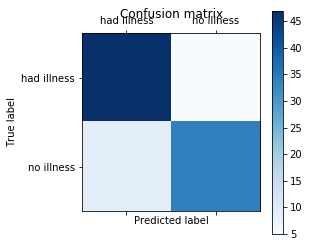

In [10]:
performance_metrics(actual, predicted)

The model accuracy is good at 85%.
The True positive error and True negative errors (note the diagongal quads) also have high values, showing that the model is good.

## Case study question: Longley's Economic Regression Data
(20 points)

Longley's Economic Regression Data is a famous data set. The end goal is to understand time-series trends and also to fit a linear regression model to predict employment. __Note: you are not expected to break the data into train and test sets, as there are only 16 years of data points__. Your analysis should include:

1. Descriptive analysis of the data
1. Model building and interpreting variables

The data in mtcars is:
1. GNP.deflator: GNP implicit price deflator (1954=100)
1. GNP: Gross National Product.
1. Unemployed: number of unemployed.
1. Armed.Forces: number of people in the armed forces.
1. Population: `noninstitutionalized` population ≥ 14 years of age.
1. Year: the year (time).
1. Employed: number of people employed.

In [11]:
# solution

# you may also use statsmodels or any other appropriate package.
# read the dataset:
import pandas as pd
import seaborn as sns
df_econ = pd.read_csv("datasets/longley.csv")
df_econ.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,96.2,328.975,209.9,309.9,112.075,1951,63.221


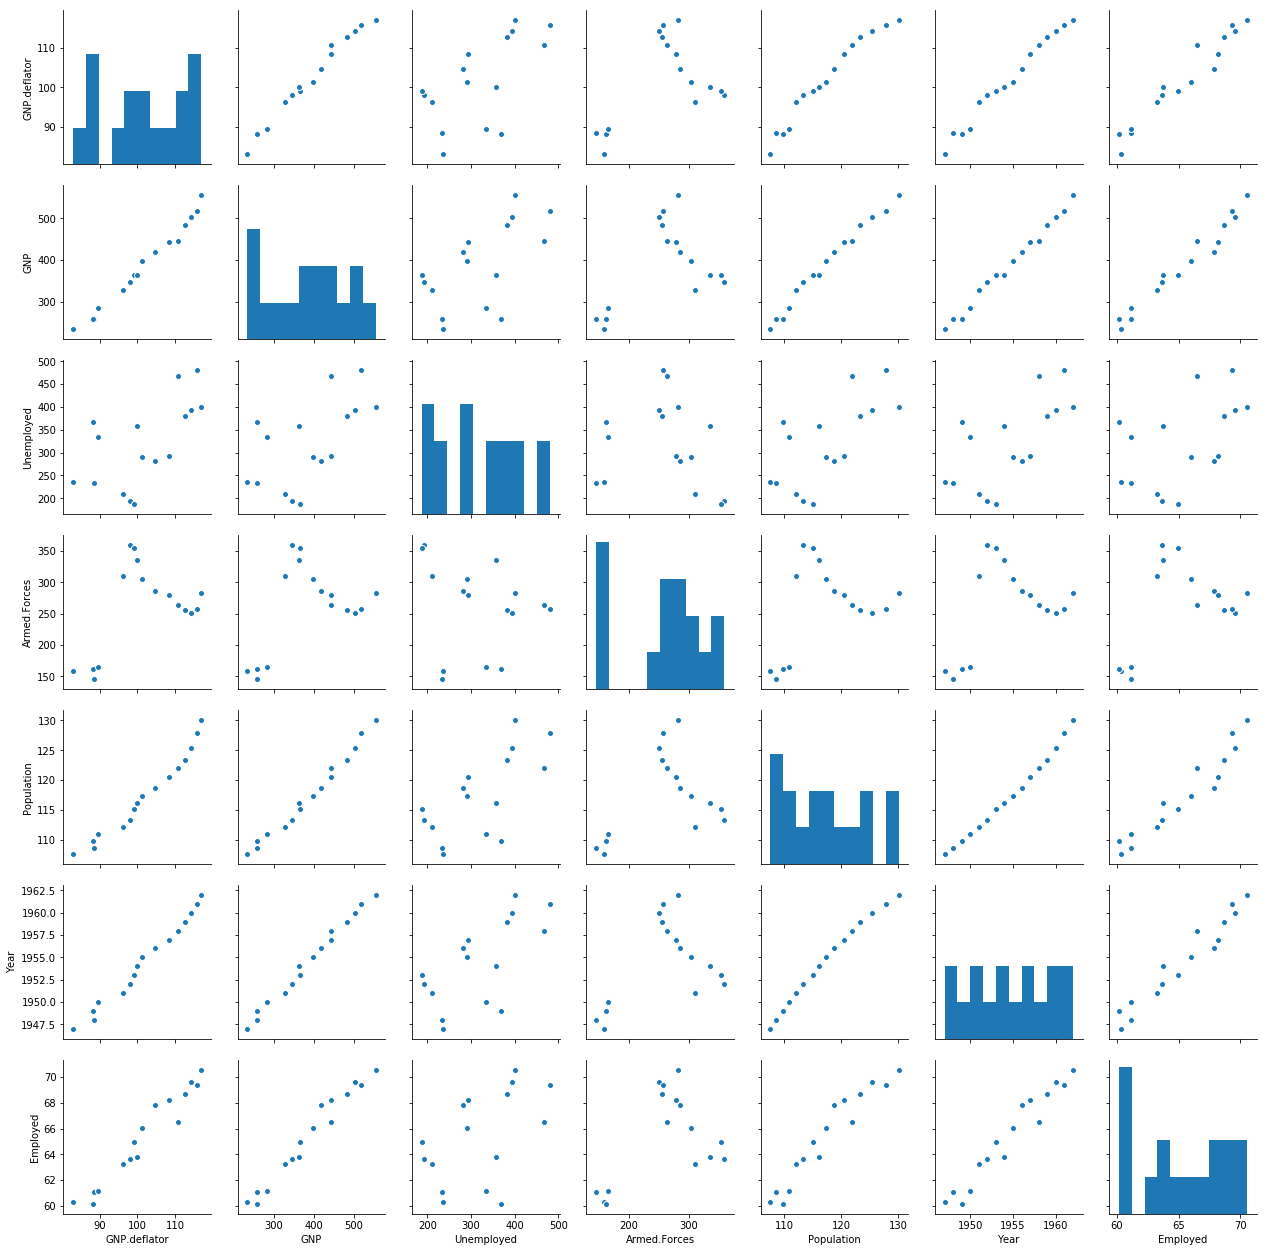

In [12]:
# descriptive stats
% matplotlib inline
import seaborn as sns
sns.pairplot(df_econ, vars = df_econ.columns)

In [13]:
df_econ.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,101.681250,387.698438,319.331250,260.66875,117.424000,1954.500000,65.317000
std,10.791553,99.394938,93.446425,69.59196,6.956102,4.760952,3.511968
min,83.000000,234.289000,187.000000,145.60000,107.608000,1947.000000,60.171000
25%,94.525000,317.881000,234.825000,229.80000,111.788500,1950.750000,62.712500
50%,100.600000,381.427000,314.350000,271.75000,116.803500,1954.500000,65.504000
75%,111.250000,454.085500,384.250000,306.07500,122.304000,1958.250000,68.290500
max,116.900000,554.894000,480.600000,359.40000,130.081000,1962.000000,70.551000


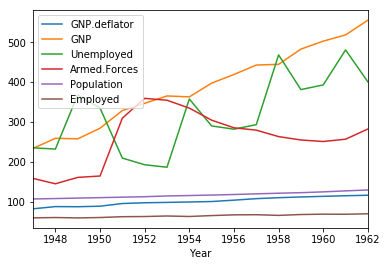

In [14]:
# plotting time series
import numpy as np
columns_ts = ['GNP.deflator', 'GNP', 'Unemployed', 'Armed.Forces', 'Population','Employed']

df = pd.DataFrame(
    np.array(df_econ[columns_ts]), 
    index=df_econ.Year,
    columns=columns_ts
)
df.plot()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt

x_features = df_econ.columns[:-1]
x = df_econ[x_features].as_matrix()
y = df_econ.Employed

# use can use sklearn model selection to split into train test or your own method.
lm = LinearRegression()
lm.fit(x, y)
pred = lm.predict(x)

In [17]:
list(zip(lm.coef_, x_features))

[(0.015061872271373705, 'GNP.deflator'),
 (-0.035819179292590292, 'GNP'),
 (-0.02020229803816807, 'Unemployed'),
 (-0.01033226867173585, 'Armed.Forces'),
 (-0.051104105653583476, 'Population'),
 (1.8291514646135369, 'Year')]

This data shows multi-colinearity. We should consider using a method to mitigate that issue.
The Year variable has the highest coefficient which is positive. All others are negatively correlated with Employment. 
It is odd that GNP is negatively correlated. 

In [18]:
# mean squared error
print('overall error is {}'.format(sklearn.metrics.mean_squared_error(pred, y)))

overall error is 0.05227650346912037
